# Supervised Learning Workshop
This notebook introduces the basic workflow for supervised machine learning using scikit-learn.
Inspired by: *Introduction to Machine Learning with Python* by Andreas Müller and Sarah Guido.

## 1. Load and Explore the Dataset
We'll use the Iris dataset, a classic classification problem.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Train/Test Split
We split our data to evaluate how well our model generalizes.

In [3]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((112, 4), (38, 4))

## 3. Train a Model
We start with k-Nearest Neighbors (k-NN), a simple and intuitive classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('Test accuracy:', knn.score(X_test, y_test))

Test accuracy: 0.9736842105263158


## 4. Try Another Classifier (Logistic Regression)
Experiment with different models and see how results compare.

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
print('Test accuracy (Logistic Regression):', lr.score(X_test, y_test))

Test accuracy (Logistic Regression): 0.9736842105263158


In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Test accuracy (Decision Tree):', tree.score(X_test, y_test))

Test accuracy (Decision Tree): 0.9736842105263158


In [9]:
#challenge 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Skapa och träna modellen
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Gör prediktioner på testdatan
y_pred = tree.predict(X_test)

# Utvärdera modellen
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9736842105263158


## 5. Mini Challenge
Try these tasks:
1. Train a `DecisionTreeClassifier` and compare test accuracy.
2. Change `n_neighbors` in `KNeighborsClassifier` to 1, 5, and 10 and see how accuracy changes.
3. Plot a confusion matrix using `sklearn.metrics.confusion_matrix`.

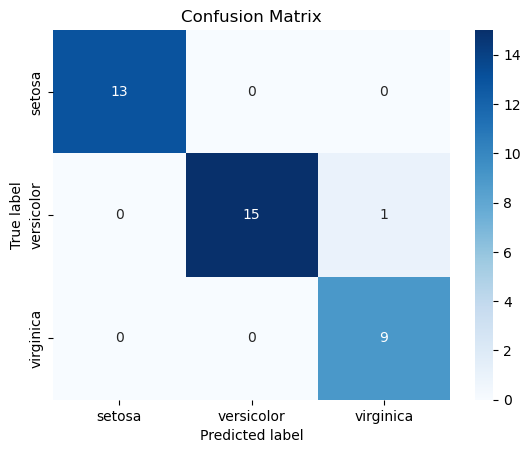

In [17]:
#challenge 3
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Skapa confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot med seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
#challengen 2
#1 = ingen förändran, på någon av dessa, men när jag tgesta 100 så gick accuracy ned till 0,6. Den blir underfittad vid 100, när den 
# Tittaar på 100 grannar, då modellen är för enekl och ej kan fånga upp detaljerna.